# US CRIME - Effect of Punishment Regimes on Crime Rates

Author: **Artur Chiaperini Grover**   

-------   

In this exercise, I will create a regression model in order to find out what is the crime rate, denoted by variable `Crime`, for the following point (where variables assume the values):
- `M = 14.0`
- `So = 0`
- `Ed = 10.0`
- `Po1 = 12.0`
- `Po2 = 15.5`
- `LF = 0.640`
- `M.F = 94`
- `Pop = 150`
- `NW = 1.1`
- `U1 = 0.120`
- `U2 = 3.6`
- `Wealth = 3200`
- `Ineq = 20.1`
- `Prop = 0.04`
- `Time = 39.0` 
- `Crime = ???` 

-------    

# Data Description

The dataset can be found in [here](http://www.statsci.org/data/general/uscrime.html), and the information below was extracted from it.

>In order to investigate the effect of punishment regimes on crime rates, criminologists used the aggregated data of 47 states of the USA for 1960. The variables considered in this study are the following:   
>
>| Variable | Description |
>|:---------|:------------|
>| M		| percentage of males aged 14–24 in total state population |
>| So	    | indicator variable for a southern state |
>| Ed	    | mean years of schooling of the population aged 25 years or over |
>| Po1	    | per capita expenditure on police protection in 1960 |
>| Po2	    | per capita expenditure on police protection in 1959 |
>| LF	    | labour force participation rate of civilian urban males in the age-group 14-24 |
>| M.F	    | number of males per 100 females |
>| Pop	    | state population in 1960 in hundred thousands |
>| NW	    | percentage of nonwhites in the population |
>| U1       | unemployment rate of urban males 14–24 |
>| U2	    | unemployment rate of urban males 35–39 |
>| Wealth   | wealth: median value of transferable assets or family income |
>| Ineq	    | income inequality: percentage of families earning below half the median income |
>| Prob	    | probability of imprisonment: ratio of number of commitments to number of offenses |
>| Time	    | average time in months served by offenders in state prisons before their first release |
>| Crime	| crime rate: number of offenses per 100,000 population in 1960 |   

--------
# Data Exploration

Our goal is to model the experiment based on the dataset in order to determine the crime rate for the variables values given above. We can see the `Crime` (crime rate) as a function of the other variables, for instance:
$$
\begin{equation}
    f(\mathbf{X}) = \mathbf{A} * \mathbf{X} + C, 
\end{equation}
$$
where $f(\mathbf{X}) = Y = $ `Crime`, $\mathbf{X} = $ `(M, So, Ed, Po1, Po2, LF, M.F, Pop, NW, U1, U2, Wealth, Ineq, Prob, Time)`, $\mathbf{A}$ are the parameters of the model, and $C$ is a constant. At this point this is just one idea to illustrate the the problem, as a linear case, which in the future may turn out to be not the reality.  

Below we load the dataset and assign it to a pandas DataFrame object `df_crimes`, this allow us to have an initial look at our dataset.

In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go 
from plotly.subplots import make_subplots
import statsmodels.api as sm

In [2]:
df_crimes = pd.read_csv("../dataset/uscrime.txt", sep="\t")

In [3]:
df_crimes.head(10)

,M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time,Crime
0,15.1,1,9.1,5.8,5.6,0.510,95.0,33,30.1,0.108,4.1,3940,26.1,0.084602,26.2011,791
1,14.3,0,11.3,10.3,9.5,0.583,101.2,13,10.2,0.096,3.6,5570,19.4,0.029599,25.2999,1635
2,14.2,1,8.9,4.5,4.4,0.533,96.9,18,21.9,0.094,3.3,3180,25.0,0.083401,24.3006,578
3,13.6,0,12.1,14.9,14.1,0.577,99.4,157,8.0,0.102,3.9,6730,16.7,0.015801,29.9012,1969
4,14.1,0,12.1,10.9,10.1,0.591,98.5,18,3.0,0.091,2.0,5780,17.4,0.041399,21.2998,1234
5,12.1,0,11.0,11.8,11.5,0.547,96.4,25,4.4,0.084,2.9,6890,12.6,0.034201,20.9995,682
6,12.7,1,11.1,8.2,7.9,0.519,98.2,4,13.9,0.097,3.8,6200,16.8,0.042100,20.6993,963
7,13.1,1,10.9,11.5,10.9,0.542,96.9,50,17.9,0.079,3.5,4720,20.6,0.040099,24.5988,1555
8,15.7,1,9.0,6.5,6.2,0.553,95.5,39,28.6,0.081,2.8,4210,23.9,0.071697,29.4001,856
9,14.0,0,11.8,7.1,6.8,0.632,102.9,7,1.5,0.100,2.4,5260,17.4,0.044498,19.5994,705


In [4]:
print(f"Dataset dimension: {df_crimes.shape}")
print(f"Inspection of missing values: \n{df_crimes.isnull().sum()}")

Dataset dimension: (47, 16)
Inspection of missing values: 
M         0
So        0
Ed        0
Po1       0
Po2       0
LF        0
M.F       0
Pop       0
NW        0
U1        0
U2        0
Wealth    0
Ineq      0
Prob      0
Time      0
Crime     0
dtype: int64


Our data has no missing values, as we can see from above.

According to the data description, `So` is an indicator variable which should be treated as a categorical variable.

From the data, its shape has dimension 47 X 15. There are 47 points (`Crime`), and each one of theses points have 15 variables. 

In [5]:
df_crimes['So'] = df_crimes['So'].astype('category')
df_crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   M       47 non-null     float64 
 1   So      47 non-null     category
 2   Ed      47 non-null     float64 
 3   Po1     47 non-null     float64 
 4   Po2     47 non-null     float64 
 5   LF      47 non-null     float64 
 6   M.F     47 non-null     float64 
 7   Pop     47 non-null     int64   
 8   NW      47 non-null     float64 
 9   U1      47 non-null     float64 
 10  U2      47 non-null     float64 
 11  Wealth  47 non-null     int64   
 12  Ineq    47 non-null     float64 
 13  Prob    47 non-null     float64 
 14  Time    47 non-null     float64 
 15  Crime   47 non-null     int64   
dtypes: category(1), float64(12), int64(3)
memory usage: 5.8 KB


In [6]:
df_crimes.describe()

,M,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time,Crime
count,47.000000,47.00000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,13.857447,10.56383,8.500000,8.023404,0.561191,98.302128,36.617021,10.112766,0.095468,3.397872,5253.829787,19.400000,0.047091,26.597921,905.085106
std,1.256763,1.11870,2.971897,2.796132,0.040412,2.946737,38.071188,10.282882,0.018029,0.844545,964.909442,3.989606,0.022737,7.086895,386.762697
min,11.900000,8.70000,4.500000,4.100000,0.480000,93.400000,3.000000,0.200000,0.070000,2.000000,2880.000000,12.600000,0.006900,12.199600,342.000000
25%,13.000000,9.75000,6.250000,5.850000,0.530500,96.450000,10.000000,2.400000,0.080500,2.750000,4595.000000,16.550000,0.032701,21.600350,658.500000
50%,13.600000,10.80000,7.800000,7.300000,0.560000,97.700000,25.000000,7.600000,0.092000,3.400000,5370.000000,17.600000,0.042100,25.800600,831.000000
75%,14.600000,11.45000,10.450000,9.700000,0.593000,99.200000,41.500000,13.250000,0.104000,3.850000,5915.000000,22.750000,0.054450,30.450750,1057.500000
max,17.700000,12.20000,16.600000,15.700000,0.641000,107.100000,168.000000,42.300000,0.142000,5.800000,6890.000000,27.600000,0.119804,44.000400,1993.000000


Another useful method of `df_crimes` object is `.describe()` which summarises the variables and we can start to see the minimum and maximum of the dataset, as well as the mean values of each varible.  

We can see that the total count holds for every variable as was shown by `.info()` method, and we also see that all of the variables are positive. Given the kind of study these variables relate to, the fact that all of them are positive is rather expected. These variables, according to the description, are porcentages, counts, and averages of positive or null numbers, thus we would not expect to find any negative number.   

In [7]:
fig = px.bar(df_crimes, x='So', y='Crime', barmode='group', color='So')
fig.show()

The above bar plot shows that where `So` is $0$, the total amount of Crime rate is higher. From the dataset description is not clear if `So` equals $0$ means it is not a southern state, or otherwise.

Initially, we can assume we have 15 independent variables `(M, So, Ed, Po1, Po2, LF, M.F, Pop, NW, U1, U2, Wealth, Ineq, Prob, Time)`, and a dependent variable `Crime`.

The heatmap is a good way to visualize the cross-correlation of the variables. The correlation analysis indicates there might be dependencies between variables, and then it is possible to apply a dimensionality reduction, or even eliminating one of the variables if the correlation is too strong.

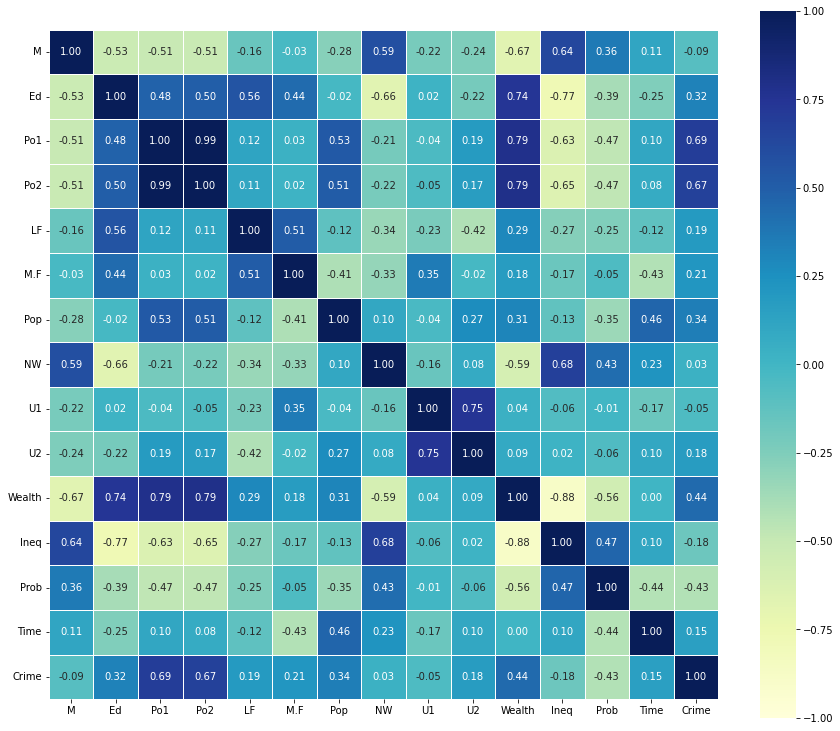

In [8]:
fig, ax = plt.subplots(figsize=(15,13))

corr_crimes = df_crimes.corr()

sns.heatmap(corr_crimes, vmin=-1.0, vmax=1.0, center=0.0, fmt='.2f',
                square=True, linewidths=0.5, annot=True, cmap='YlGnBu')

plt.yticks(rotation=0)
plt.show()

The heatmap above shows the pearson correlation between variables, which varies from -1.0 (negative correlation) to 1.0 (positive correlation):
- Negative Correlation: variables behave in the opposite direction, while variable A is increasing, variable B is decreasing.
- Positive Correlation: both variables A and B behave in the same direction, such that when A increases, B increases as well.
- No Correlation (values close to 0.0): there is no relationship between the variables A and B.   

We can see that some variables have a strong positive correlation between each other, below is an enumeration of set of variables that present some significant correlation value:
- `Po1` and `Po2` have positive correlation of 0.99.
- `Wealth` and `Ed`, `Wealth` and `Po1`, `Wealth` and `Po2` have positive correlations, respectively, 0.74, 0.79, 0.79.
- `NW` and `So` have a correlation of 0.77.
- `Ineq` and `Ed` have a negative correlation of -0.77.
- `Wealth` and `Ineq` have a negative correlation of -0.88.
- `U1` and `U2` have a positive correlation of 0.75.



At this point the idea is not to explain why these behaviours happen, but to point out what we can see from the data. Nevertheless, `Po1` and `Po2` high correlation is due to the fact that the values of both columns are pretty much the same. This aspect is shown on the Figure below, where the linear relationship between `Po1` and `Po2` is rather clear. Because of the linear relation between theses two variables, we will continue the analysis considering only `Po1`. Another reason to keep only `Po1` instead of `Po2` is that `Po1` correlation with `Crime` is greater than the correlation of `Po2` and `Crime`.

In [9]:
fig = px.scatter(df_crimes, x='Po1', y='Po2', trendline='ols')
fig.update_layout(title='Po1 vs Po2')
fig.show()

In the following Figure, we will look at the relationship of `Wealth` and the variables `Ed`, `Po1`, `Ineq` and `M`. 

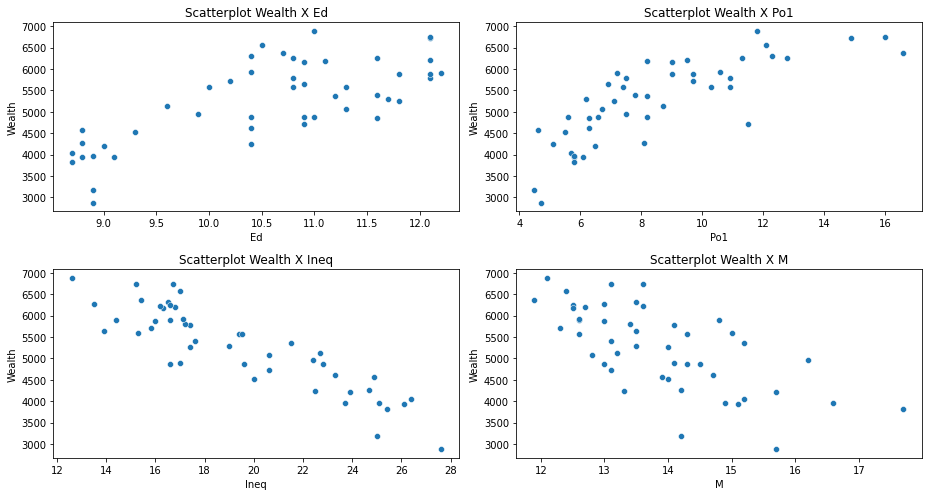

In [10]:
fig = plt.figure(figsize=(13,7))
gs = mpl.gridspec.GridSpec(2,2, figure=fig)

ax0 = fig.add_subplot(gs[0,0])
ax0 = sns.scatterplot(x='Ed', y='Wealth', data=df_crimes)
ax0.set_title("Scatterplot Wealth X Ed")

ax1 = fig.add_subplot(gs[0,1])
ax1 = sns.scatterplot(x='Po1', y='Wealth', data=df_crimes)
ax1.set_title("Scatterplot Wealth X Po1")

ax2 = fig.add_subplot(gs[1,0])
ax2 = sns.scatterplot(x='Ineq', y='Wealth', data=df_crimes)
ax2.set_title("Scatterplot Wealth X Ineq")

ax3 = fig.add_subplot(gs[1,1])
ax3 = sns.scatterplot(x='M', y='Wealth', data=df_crimes)
ax3.set_title("Scatterplot Wealth X M")

plt.tight_layout()
plt.show()

The top graphs show that `Wealth` increase as `Ed` and `Po1` increase, while `Wealth` decreases as `Ineq` and `M` increase. Theses trends are very subtle in all four cases, but it matches exactly what we got from the correlation map. 

We can also have a look at the distribution of crime rates.

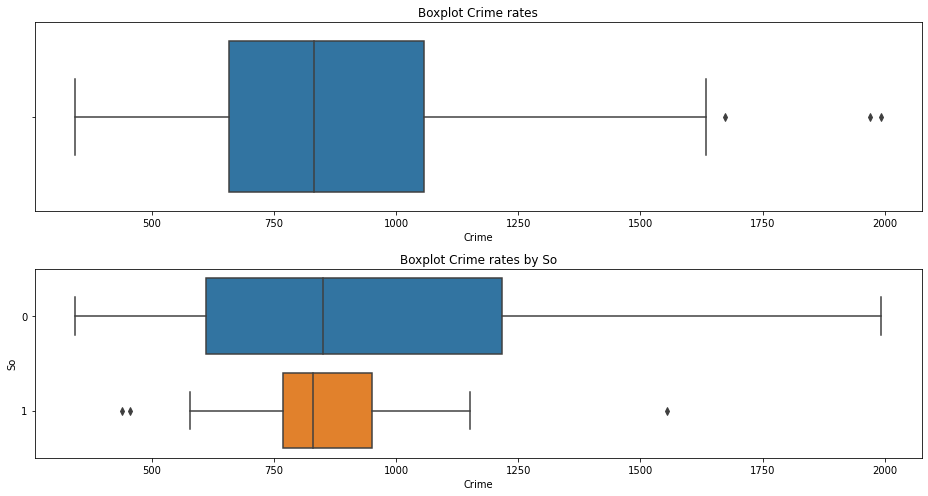

In [11]:
fig = plt.figure(figsize=(13,7))
gs = mpl.gridspec.GridSpec(2,1, figure=fig)

ax0 = fig.add_subplot(gs[0,0])
ax0 = sns.boxplot(x='Crime', data=df_crimes)
ax0.set_title("Boxplot Crime rates")

ax1 = fig.add_subplot(gs[1,0])
ax1 = sns.boxplot(x='Crime', y='So', data=df_crimes)
ax1.set_title("Boxplot Crime rates by So")

plt.tight_layout()
plt.show()

`Crime` distribution seems to have only 3 outliers. The Boxplot also show that the median number of offenses per 100000 people is around 800.

-------
# Data Modeling

Now at this step we will be testing a few modeling options before making a decision.

To tackle this problem we are going to make use of [scikit-learn](https://scikit-learn.org/stable/index.html) module.

From the analysis done on data exploration, we will no longer take into consideration the variable `Po2`.

In [12]:
df_crimes.drop('Po2', axis=1, inplace=True)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

### Multivariate Linear Regression

As an initial trial we can think about the relationship between `Crime` and the other variables as a linear relationship.

In statistic modeling, whenever we have variables that are in different scale, we transform them to standard score units, also known as z-score. This transformation changes the scale of the variables, so that for each point of each variable the value is dimensionless. By doing so, we avoid scaling and magnitude differences, for instance, if we take `Wealth` and `U1`, `Wealth` maximum is 6890, while `U1` maximum is 0.142, there is a huge magnitude difference, and it can wrongly biases the model in a way it may give `Wealth` more importance than `U1`.

In this exercise we will apply standard scale to the variables using the method `StandardScaler` of `scikit-learn`.

Below, `to_predict` holds the information of the point we would like to predict the crime rate.

In [14]:
to_predict = pd.DataFrame(np.array([[14.0, 0, 10.0, 12, 0.640, 94, 150, 1.1, 0.120, 3.6, 3200, 20.1, 0.04, 39]]), 
                          columns=df_crimes.drop('Crime', axis=1).columns.values)
to_predict

,M,So,Ed,Po1,LF,M.F,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time
0,14.0,0.0,10.0,12.0,0.64,94.0,150.0,1.1,0.12,3.6,3200.0,20.1,0.04,39.0


In [15]:
results = {}

With `scikit-learn` it is possible to run a set of process using a `Pipeline`, this automizes the transformation with `StandardScaler` and the linear regression.

In [16]:
numerical_var = [col for col in df_crimes.columns if (col != 'Crime') and (col != 'So')]
categorical_var = ['So']

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

In [17]:
preprocessor = ColumnTransformer(
                    transformers=[
                        ('num', numerical_transformer, numerical_var),
                        ('cat', categorical_transformer, categorical_var)])

We also have to separete the dependent variable from the independent variables, we assign the features that will be used in the regression to `X` and the crime rates, `Crime`, to `y`.

In [18]:
X = df_crimes.drop('Crime', axis=1)
y = df_crimes['Crime']

In [19]:
X.head(3)

,M,So,Ed,Po1,LF,M.F,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time
0,15.1,1,9.1,5.8,0.510,95.0,33,30.1,0.108,4.1,3940,26.1,0.084602,26.2011
1,14.3,0,11.3,10.3,0.583,101.2,13,10.2,0.096,3.6,5570,19.4,0.029599,25.2999
2,14.2,1,8.9,4.5,0.533,96.9,18,21.9,0.094,3.3,3180,25.0,0.083401,24.3006


In [20]:
y.head(3)

0     791
1    1635
2     578
Name: Crime, dtype: int64

Before running the linear regression, we can split the dataset into a training set and a testing set. Whatever data is used on the training set is not part of the testing set and vice-versa. Then we use the training set to model the regression and the testing set to evaluate how good our model is. 

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

`full_linreg` is the whole processing flow. After we have fit the model to the data, we can check out the `score` which is the coefficient of determination, also known as r-squared. This value measures how accurate the modeling is, if r-squared is 1, then there is a perfect prediction.

In [22]:
full_linreg = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regression', LinearRegression())])

In [23]:
full_linreg.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['M', 'Ed', 'Po1', 'LF',
                                                   'M.F', 'Pop', 'NW', 'U1',
                                                   'U2', 'Wealth', 'Ineq',
                                                   'Prob', 'Time']),
                                                 ('cat', OneHotEncoder(),
                                                  ['So'])])),
                ('regression', LinearRegression())])

To keep track of tests and mdeling, I have saved some results in a dictionary called `results`.

In [24]:
y_predict = full_linreg.predict(X_test)

In [25]:
results['full_linreg'] = {'MAE': mean_absolute_error(y_test, y_predict),
                          'MSE': mean_squared_error(y_test, y_predict),
                          'R2': r2_score(y_test, y_predict)}

In [26]:
categorical_transformer_binary = OneHotEncoder(drop='if_binary')
preprocessor = ColumnTransformer(
                    transformers=[
                        ('num', numerical_transformer, numerical_var),
                        ('cat_bin', categorical_transformer_binary, categorical_var)])
full_linreg_bin = Pipeline(
                    steps=[('preprocessor', preprocessor),
                           ('regression', LinearRegression())])
full_linreg_bin.fit(X_train, y_train)
y_predict = full_linreg_bin.predict(X_test)
results['full_linreg_bin'] = {'MAE': mean_absolute_error(y_test, y_predict),
                              'MSE': mean_squared_error(y_test, y_predict),
                              'R2': r2_score(y_test, y_predict)}

In [27]:
pd.DataFrame(results)

,full_linreg,full_linreg_bin
MAE,162.928599,162.928599
MSE,45038.076003,45038.076003
R2,0.778025,0.778025


In [28]:
results.pop('full_linreg_bin', None)

{'MAE': 162.9285989643268, 'MSE': 45038.07600299877, 'R2': 0.778024544763858}

We can test other approaches, for instance, we take only the variables that had a correlation coeffient within the following ranges:
- 0.3 to 0.7. 
- -0.7 to -0.3.

By doing so we would not exclude variables that have a negative correlation with `Crime`. And then we try to keep only variables that seems to be more relevant to describe the phenomenon of crime rates.

In [29]:
corr_value = df_crimes.corr()['Crime']
print(corr_value)

M        -0.089472
Ed        0.322835
Po1       0.687604
LF        0.188866
M.F       0.213914
Pop       0.337474
NW        0.032599
U1       -0.050478
U2        0.177321
Wealth    0.441320
Ineq     -0.179024
Prob     -0.427422
Time      0.149866
Crime     1.000000
Name: Crime, dtype: float64


In [30]:
conditional = (corr_value > -0.7) & (corr_value < -0.3) | (corr_value > 0.3) & (corr_value < 0.7)

In [31]:
conditional['So'] = True

In [32]:
X_2 = X[df_crimes.loc[:, conditional].columns.values]

In [33]:
X_2.head(5)

,So,Ed,Po1,Pop,Wealth,Prob
0,1,9.1,5.8,33,3940,0.084602
1,0,11.3,10.3,13,5570,0.029599
2,1,8.9,4.5,18,3180,0.083401
3,0,12.1,14.9,157,6730,0.015801
4,0,12.1,10.9,18,5780,0.041399


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_2, y, test_size=0.3, random_state=42, shuffle=True)

In [35]:
X2_numerical_var = [col for col in X_2.columns if (col != 'So')]

preprocessor = ColumnTransformer(
                    transformers=[
                        ('num', numerical_transformer, X2_numerical_var),
                        ('cat', categorical_transformer, categorical_var)])

corr_linreg = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regression', LinearRegression())])

corr_linreg.fit(X_train, y_train)
y_predict = corr_linreg.predict(X_test)
results['corr_linreg'] = {'MAE': mean_absolute_error(y_test, y_predict),
                              'MSE': mean_squared_error(y_test, y_predict),
                              'R2': r2_score(y_test, y_predict)}

In [36]:
pd.DataFrame(results)

,full_linreg,corr_linreg
MAE,162.928599,220.961329
MSE,45038.076003,87244.128380
R2,0.778025,0.570007


From the table above, we can see that considering only variables with correlation coefficients with the purposed ranges did not improved the final result compared to using all variables.

Still using the idea of limiting variables by the correlation values, we can increase a little bit the ranges, but keeping outside the variables that had values closer to zero.

In [37]:
conditional = (corr_value > -0.7) & (corr_value < -0.1) | (corr_value > 0.1) & (corr_value < 0.7)
conditional['So'] = True
X_3 = X[df_crimes.loc[:, conditional].columns.values]

X_3.head(5)

,So,Ed,Po1,LF,M.F,Pop,U2,Wealth,Ineq,Prob,Time
0,1,9.1,5.8,0.510,95.0,33,4.1,3940,26.1,0.084602,26.2011
1,0,11.3,10.3,0.583,101.2,13,3.6,5570,19.4,0.029599,25.2999
2,1,8.9,4.5,0.533,96.9,18,3.3,3180,25.0,0.083401,24.3006
3,0,12.1,14.9,0.577,99.4,157,3.9,6730,16.7,0.015801,29.9012
4,0,12.1,10.9,0.591,98.5,18,2.0,5780,17.4,0.041399,21.2998


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_3, y, test_size=0.3, random_state=42, shuffle=True)

In [39]:
X3_numerical_var = [col for col in X_3.columns if (col != 'So')]

preprocessor = ColumnTransformer(
                    transformers=[
                        ('num', numerical_transformer, X3_numerical_var),
                        ('cat', categorical_transformer, categorical_var)])

corr2_linreg = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regression', LinearRegression())])

corr2_linreg.fit(X_train, y_train)

y_predict = corr2_linreg.predict(X_test)
results['corr2_linreg'] = {'MAE': mean_absolute_error(y_test, y_predict),
                           'MSE': mean_squared_error(y_test, y_predict),
                           'R2': r2_score(y_test, y_predict)}

In [40]:
pd.DataFrame(results)

,full_linreg,corr_linreg,corr2_linreg
MAE,162.928599,220.961329,175.619922
MSE,45038.076003,87244.128380,55479.884940
R2,0.778025,0.570007,0.726561


Compared with the first correlation selection approach, we did have some improvements with the second approach, where more variables were used, but still not a very good test score if we look at the results using all variables.

In the next test, we will go back to our heatmap and pick only one variable from each couple of variables that present high correlation. We have already done that with `Po1` and `Po2`, but now we will also look at the following couples:
- `U1` and `U2`: correlation = 0.75.
- `M` and `So`: correlation = 0.58.
- `Ed` and `So`: correlation = -0.70.
- `M.F` and `LF`: correlation = 0.51.
- `Wealth` and `Ineq`: correlation = -0.88.

Then given these correlation values, we can decide to keep only one of the variables based on the correlation with `Crime`. From the options above, we can select: `U2`, `M`, `Ed`, `M.F` and `Wealth`.

There is one aspect of `Wealth` that is interesting to highlight which is the fact that `Wealth` has a high correlation with `Ed` and `Po1`. So instead of choosing `Wealth` over `Ineq`, it is important to test both cases.

`conditional1` selects `Wealth` instead of `Ineq` and then `conditional2` does the other way.

In [41]:
conditional1 = ['M', 'Ed', 'Po1', 'M.F', 'U2', 'Wealth', 'Prob', 'Time']
conditional2 = ['M', 'Ed', 'Po1', 'M.F', 'U2', 'Ineq', 'Prob', 'Time']

In [42]:
X_4a = X[conditional1]

X_train, X_test, y_train, y_test = train_test_split(X_4a, y, test_size=0.3, random_state=42, shuffle=True)

preprocessor = ColumnTransformer(
                    transformers=[
                        ('num', numerical_transformer, X_4a.columns.values)])

m1_linreg = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regression', LinearRegression())])

m1_linreg.fit(X_train, y_train)

y_predict = m1_linreg.predict(X_test)
results['m1_linreg'] = {'MAE': mean_absolute_error(y_test, y_predict),
                        'MSE': mean_squared_error(y_test, y_predict),
                        'R2': r2_score(y_test, y_predict)}

In [43]:
X_4b = X[conditional2]

X_train, X_test, y_train, y_test = train_test_split(X_4b, y, test_size=0.3, random_state=42, shuffle=True)

preprocessor = ColumnTransformer(
                    transformers=[
                        ('num', numerical_transformer, X_4b.columns.values)])

m2_linreg = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regression', LinearRegression())])

m2_linreg.fit(X_train, y_train)

y_predict = m2_linreg.predict(X_test)
results['m2_linreg'] = {'MAE': mean_absolute_error(y_test, y_predict),
                        'MSE': mean_squared_error(y_test, y_predict),
                        'R2': r2_score(y_test, y_predict)}

In [44]:
pd.DataFrame(results)

,full_linreg,corr_linreg,corr2_linreg,m1_linreg,m2_linreg
MAE,162.928599,220.961329,175.619922,191.157571,126.746919
MSE,45038.076003,87244.128380,55479.884940,54178.003150,24329.847626
R2,0.778025,0.570007,0.726561,0.732977,0.880087


The table above summarizes the tests performed so far in this data modeling:
- `full_linreg`: all variables used.
- `corr_linreg`: variable selection based on narrow range of correlation with `Crime`.
- `corr2_linreg`: flexibilization of `corr_linreg`, where the correlation range considered was wider.
- `m1_linreg`: for couples of variables with high correlation, selecting only one of those variables based on the correlation with `Crime`.
- `m2_linreg`: variation of `m1_linreg` substituting `Wealth` by `Ineq`.

From the tests above, we had the last scenario where the set of variables `M`, `Ed`, `Po1`, `M.F`, `U2`, `Ineq`, `Prob`, `Time` has achieved the highest r-squared value of 88%.

For the sake of curiosity below we can have a look at the coefficients and intercept of this model.

In [45]:
list(zip(X_4b.columns, np.round(m2_linreg['regression'].coef_, 3)))

[('M', 103.447),
 ('Ed', 198.157),
 ('Po1', 305.369),
 ('M.F', 18.048),
 ('U2', 36.516),
 ('Ineq', 289.431),
 ('Prob', -95.121),
 ('Time', 23.527)]

In [46]:
print("Intercept = {}".format(np.round(m2_linreg['regression'].intercept_, 3)))

Intercept = 840.375


Considering this last model, the predicted value for the **crime rate** is **1269.51**. It is nice to point out that model `m2_linreg` use only 8 of the 15 input variables.


In [47]:
crime = m2_linreg.predict(to_predict[X_4b.columns])
print(crime)

[1276.37695715]


-------
# Model Improvement

We can try to improve the best model we got so far by doing a few tests:
1. Drop the 3 outliers with `Crime` values above the percentile 95.
2. Use another strategy to reduce dimensionality, for example, PCA.

## Test without outliers

We will drop the entries that have `Crime` value above 1750.

In [48]:
df_crimes = df_crimes.loc[df_crimes['Crime'] <= 1750]

In [49]:
X = df_crimes.drop('Crime', axis=1)
y = df_crimes['Crime']

X_no_out = X[conditional2]

X_train, X_test, y_train, y_test = train_test_split(X_no_out, y, test_size=0.3, random_state=42, shuffle=True)

preprocessor = ColumnTransformer(
                    transformers=[
                        ('num', numerical_transformer, X_no_out.columns.values)])

m2_linreg_no_out = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regression', LinearRegression(copy_X=True))])

m2_linreg_no_out.fit(X_train, y_train)

y_predict = m2_linreg_no_out.predict(X_test)
results['m2_linreg_no_out'] = {'MAE': mean_absolute_error(y_test, y_predict),
                        'MSE': mean_squared_error(y_test, y_predict),
                        'R2': r2_score(y_test, y_predict)}

In [50]:
pd.DataFrame(results)

,full_linreg,corr_linreg,corr2_linreg,m1_linreg,m2_linreg,m2_linreg_no_out
MAE,162.928599,220.961329,175.619922,191.157571,126.746919,226.787178
MSE,45038.076003,87244.128380,55479.884940,54178.003150,24329.847626,99998.194490
R2,0.778025,0.570007,0.726561,0.732977,0.880087,0.079250


From the `R2` value, the model without outliers does not improve the model

## PCA

In [51]:
from sklearn.decomposition import PCA

In [52]:
df_crimes = pd.read_csv("../dataset/uscrime.txt", sep="\t")
X = df_crimes.drop(columns=['Crime','So'], axis=1)
y = df_crimes['Crime']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

preprocessor = ColumnTransformer(
                    transformers=[
                        ('num', numerical_transformer, X.columns.values)])

linreg_PCA1 = Pipeline(steps=[('preprocessor', preprocessor),
                        ('pca', PCA()),
                        ('regression', ElasticNet())])

linreg_PCA1.fit(X_train, y_train)

y_predict = linreg_PCA1.predict(X_test)
results['linreg_PCA1'] = {'MAE': mean_absolute_error(y_test, y_predict),
                        'MSE': mean_squared_error(y_test, y_predict),
                        'R2': r2_score(y_test, y_predict)}

In [53]:
pd.DataFrame(results)

,full_linreg,corr_linreg,corr2_linreg,m1_linreg,m2_linreg,m2_linreg_no_out,linreg_PCA1
MAE,162.928599,220.961329,175.619922,191.157571,126.746919,226.787178,257.775583
MSE,45038.076003,87244.128380,55479.884940,54178.003150,24329.847626,99998.194490,108549.675556
R2,0.778025,0.570007,0.726561,0.732977,0.880087,0.079250,0.465000


In [54]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [55]:
for comp in range(2, 12, 2):
    pca = PCA(n_components=comp)
    X_scaled_pca = pca.fit_transform(X_scaled)
    lin_reg_pca = LinearRegression()
    lin_reg_pca.fit(X_scaled_pca, y_train)
    score = lin_reg_pca.score(pca.transform(X_test_scaled), y_test)
    print(f"PCA component analysis: ")
    print(f"number of components {comp} - score on test data {score}")


PCA component analysis: 
number of components 2 - score on test data 0.09763752861107866
PCA component analysis: 
number of components 4 - score on test data -0.047700534802244565
PCA component analysis: 
number of components 6 - score on test data 0.6062169552066896
PCA component analysis: 
number of components 8 - score on test data 0.5663355864119097
PCA component analysis: 
number of components 10 - score on test data 0.686527477731727


At this moment the applying PCA seems not very effective, this should be investigated in depth. For the moment, we can consider the best result based on the `R2` model `m2_linreg`.

-------
# Conclusion

To summarize, in this exercise, in order to model the crime rate for the point:  
- `M = 14.0`
- `So = 0`
- `Ed = 10.0`
- `Po1 = 12.0`
- `Po2 = 15.5`
- `LF = 0.640`
- `M.F = 94`
- `Pop = 150`
- `NW = 1.1`
- `U1 = 0.120`
- `U2 = 3.6`
- `Wealth = 3200`
- `Ineq = 20.1`
- `Prop = 0.04`
- `Time = 39.0` 
- `Crime = ???`  
we have used the [dataset](http://www.statsci.org/data/general/uscrime.txt) of crime rates of the USA for 1960. 

Based on this dataset, we initially looked at the variables to investigate which ones were more relevant to describe the crime rate. And then, we tested 5 different approaches of linear regressions; theses approaches vary by the selection of variables used to modeled `Crime` variable, our aim (dependent) variable. The first assumption we did right from the pearson correlation result was that due to the high correlation of `Po1` and `Po2`, we would only keep one of theses variables, which was `Po1`. 

From the modeling step, we manage to build a linear regression model using only 8 of the 15 input variables which has a coefficient of determination of 0.88. Moreover, given the point above with our best model, we could find the crime rate value of **1269.51**.

Further tests and improvements:
- get a better understand of the PCA application and why it didn't performed any close to feature selection.
- test other kind of regressions
- try a data augmentation